# Example No 3 :  DNN model by Keras for fashion-related items 

### What is the new we will learn in this example ?
- We will use another popular benchmark dataset stored in Keras designed for image classification tasks, **fashion_mnist**. 
- It serves as a more challenging dataset for image classification tasks due to its diverse set of fashion-related items. 
- There are 10 classes in the dataset, each representing a specific fashion category, such as T-shirts, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots.

### What are the steps to build our NN model ?
> The same life cycle for any NN model as we mentioned in the previous tutorial. 
1. Load Data
2. Scaling data 
3. Define Keras Model
4. Compile Keras Model
5. Fit Keras Model
6. Evaluate Keras Model
4. Make Predictions

### 1. Load Data
> We will divide our data into training and testing sets for the purpose of building our model.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


In [14]:
class_names[9]

'Ankle boot'

> **Our Observation Here**:

- The dataset consists of 60,000 grayscale images for training and 10,000 images for testing.
- Each image is a 28x28 pixel square, showcasing various fashion items, including clothing and accessories.

> Let's see one of these images

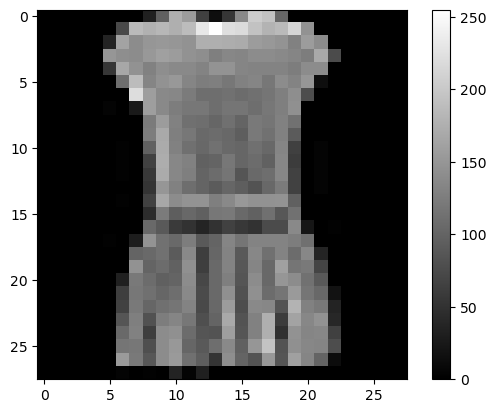

In [4]:
plt.figure()
plt.imshow(train_images[3],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

### 2. Scaling data 


In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

> Let's see 25 images of these training images with label for each one.

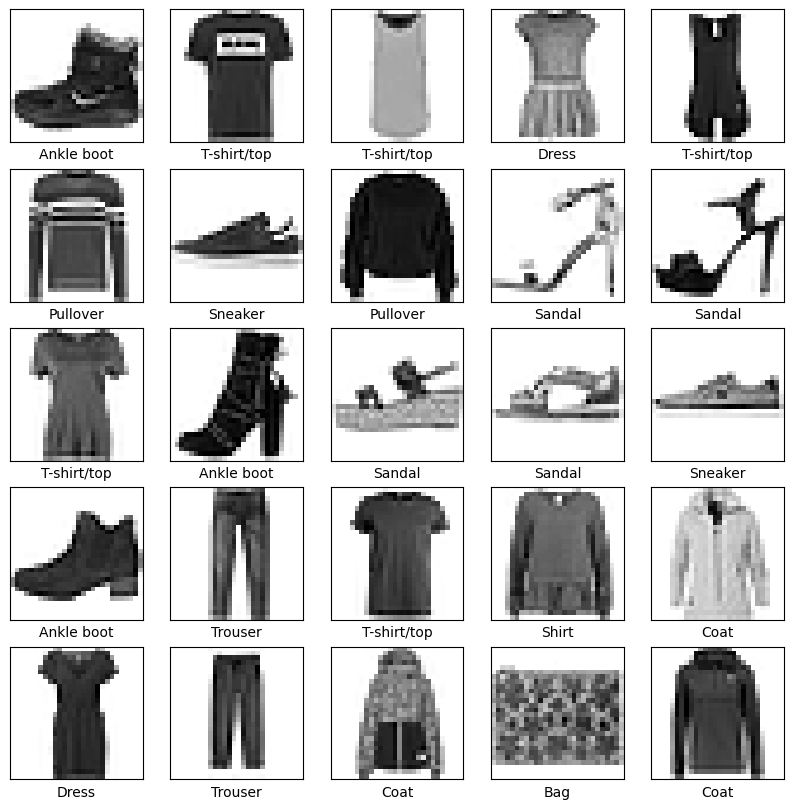

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 3. Define Keras Model


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### 4. Compile Keras Model


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 5. Fit Keras Model


In [9]:
model.fit(train_images, train_labels, epochs=15, batch_size=1000) # less epochs means UF , more epochs means OF

Epoch 1/15
60/60 [==============================] - 1s 9ms/step - loss: 0.7364 - accuracy: 0.7468
Epoch 2/15
60/60 [==============================] - 1s 9ms/step - loss: 0.4467 - accuracy: 0.8413
Epoch 3/15
60/60 [==============================] - 1s 8ms/step - loss: 0.3816 - accuracy: 0.8633
Epoch 4/15
60/60 [==============================] - 1s 8ms/step - loss: 0.3463 - accuracy: 0.8743
Epoch 5/15
60/60 [==============================] - 1s 9ms/step - loss: 0.3246 - accuracy: 0.8821
Epoch 6/15
60/60 [==============================] - 1s 10ms/step - loss: 0.3043 - accuracy: 0.8887
Epoch 7/15
60/60 [==============================] - 1s 9ms/step - loss: 0.2918 - accuracy: 0.8927
Epoch 8/15
60/60 [==============================] - 1s 9ms/step - loss: 0.2771 - accuracy: 0.8976
Epoch 9/15
60/60 [==============================] - 0s 8ms/step - loss: 0.2677 - accuracy: 0.9014
Epoch 10/15
60/60 [==============================] - 1s 9ms/step - loss: 0.2550 - accuracy: 0.9053
Epoch 11/15
60/60 

### 6. Evaluate Keras Model


In [10]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print('The accuracy of our model on test dataset : %.2f' % (val_acc*100))
print('The loss of our model on test dataset : %.2f' % (val_loss*100))

313/313 [==============================] - 0s 775us/step - loss: 0.3233 - accuracy: 0.8883
The accuracy of our model on test dataset : 88.83
The loss of our model on test dataset : 32.33


### 4. Make Predictions

> Executing the prediction function once over the entire dataset.

In [11]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 785us/step


> Let's see some cases and compare! you try any image number here as you want

The model predict the image as it is :  Pullover
And, the real image as follows 


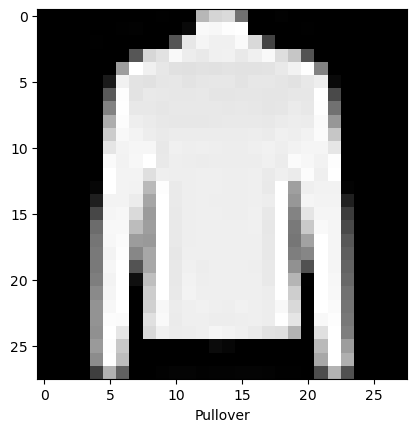

In [19]:
image_no = 255 # you can change the image number as you want

model_prediction = np.argmax(predictions[image_no])
print("The model predict the image as it is : ", class_names[model_prediction])
print("And, the real image as follows ")
plt.imshow(test_images[image_no], cmap='gray');
plt.xlabel(class_names[test_labels[image_no]]);

##### This additional part for further prediction methods is optional 

> Let's see first some of images (25) form the test data

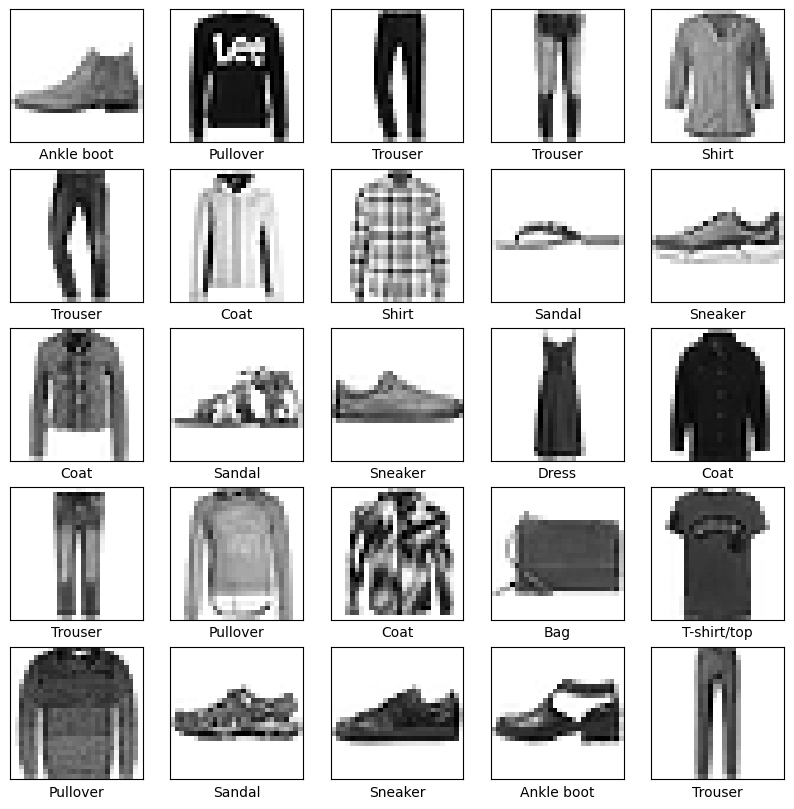

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

> Another method to see the prediction of the model 
- Plot the probability of predicted array as bars with blue line if it is true prediction and red otherwise 
- Another function to plot the image with predicted label on x-axis 

In [118]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color, fontsize=13)
  plt.subplots_adjust(left=0.2, right=2, top=2, bottom=0.2)

In [119]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


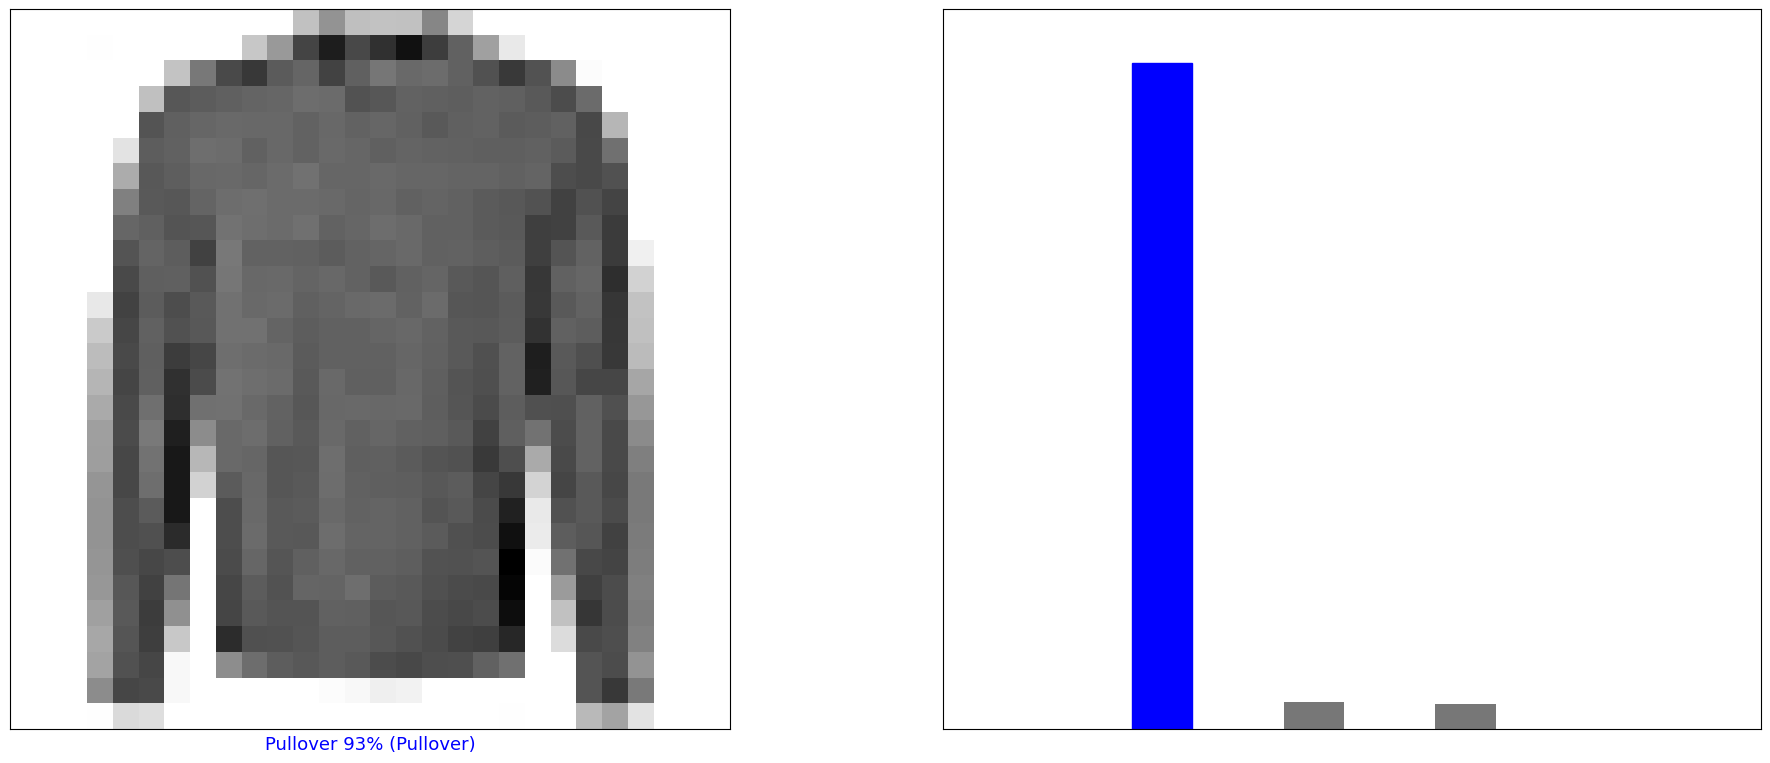

In [120]:
i = 195
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

> Apply the same for many images at once !

In [121]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*4*num_cols, 4*num_rows));

<Figure size 4800x2000 with 0 Axes>

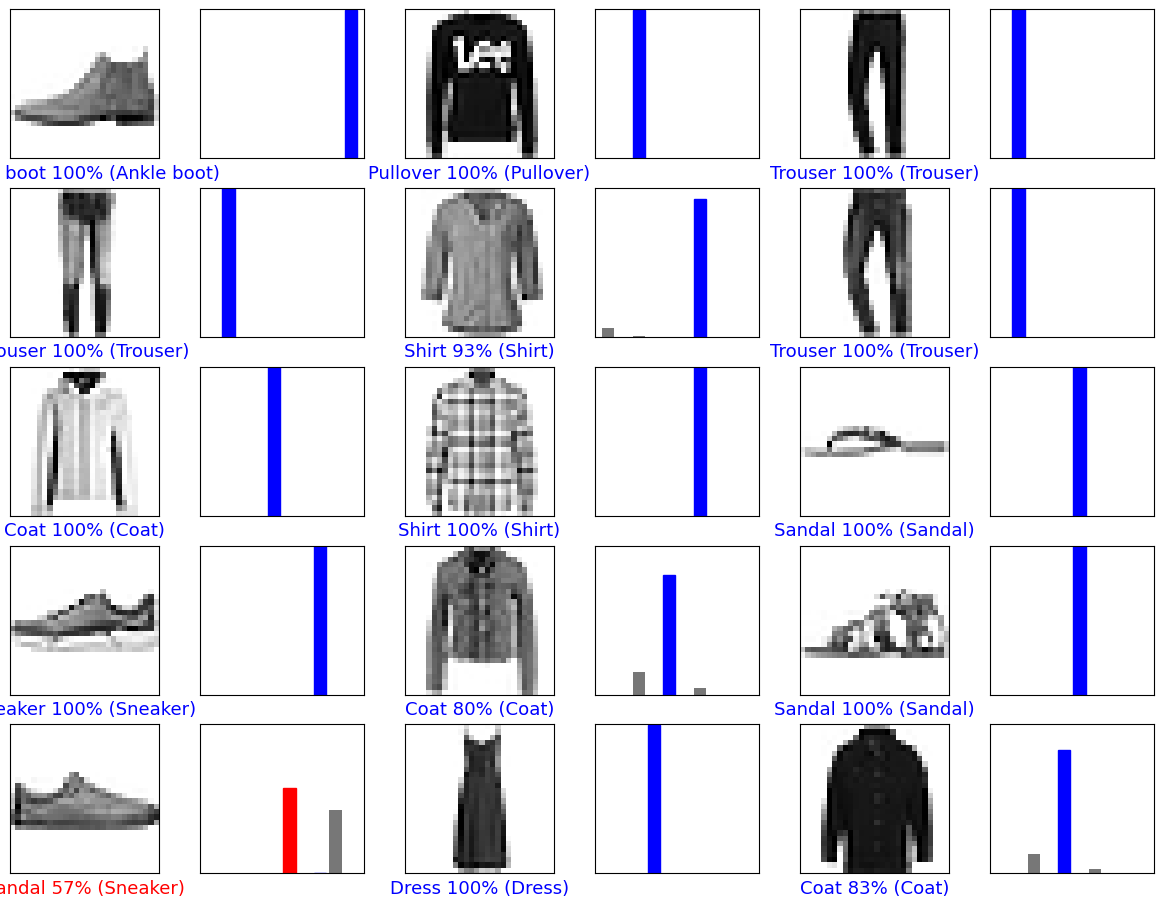

In [122]:
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

&nbsp;

### For Keras basic tools & other examples
--------------------------------------
[Keras Basic Tools for DNN](../1_Keras_BasicTools_DNN.ipynb)

[Case Study No 1](Keras_CaseStudy_no1.ipynb) : To understand how to apply rescaling to data.

[Case Study No 2](Keras_CaseStudy_no2.ipynb) : To observe the impact of increasing the number of hidden layers on the model's accuracy.

[Case Study No 4](Keras_CaseStudy_no4.ipynb) : Utilizing Keras to construct a DNN for a regression model allows for the observation of early stopping in action.

[Case Study No 5](Keras_CaseStudy_no5.ipynb) : Dogs & Cats classifications to assess whether DNN  can effectively handle the image data or not! 

&nbsp;

### Refrences
--------------------------
- <a rel="keras_website" href="https://keras.io"> Keras Official Website. </a>
- <a rel="the code used" href="https://www.youtube.com/watch?v=ohyn_MzS_hE&list=PL6-3IRz2XF5VbuU2T0gS_mFhCpKmLxvCP"> Playlist for Keras in Arabic by Hesham Asem. </a>
- <a rel="the code used2" href="https://github.com/HeshamAsem?tab=repositories"> Hesham Asem GitHub for ML tools. </a>